# 主成分分析法

什么是主成分分析：

把n维数据，降维到K维，找到新的K个方向能使得，所有样本损失最小，既所有样本间的间距最大，而一般可以使用方差来定义间距

<img src="../img/9.png" width="500" align="left"/>

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
 
<img src="../img/10.png" width="500" align="left"/>

## 使用梯度上升法求主成分

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.empty((100,2))

X[:,0] = np.random.uniform(0.,100.,size=100)
X[:,1] = 0.75 * X[:,0] + 3. + np.random.normal(0.,10.,size=100) # 把两个维度构造成线性关系，这样做的目的是降维效果明显

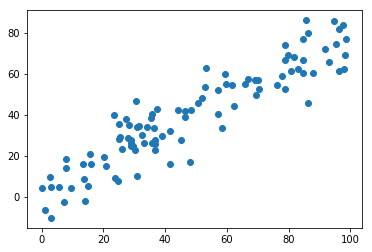

In [3]:
plt.scatter(X[:,0],X[:,1])
plt.show()

#### 1、demean

In [4]:
def demean(X):
    return X - np.mean(X,axis=0)

In [5]:
X = demean(X)

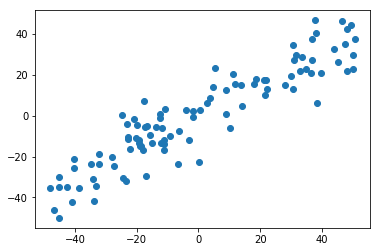

In [6]:
plt.scatter(X[:,0],X[:,1])
plt.show()

#### 2、梯度上升

In [7]:
def f(w,X):
    return np.sum(X.dot(w) ** 2) / len(X)

In [8]:
def df(w,X):
    return X.T.dot(X.dot(w))* 2. / len(X)

In [9]:
# 获取w的单位向量
def direction(w):
    return w / np.linalg.norm(w)

# 第一主成分(梯度下降法)
def first_component(init_w,X,eta=0.01,epsilon=1e-8,n_iters=1e4):    
    i_iter=0
    w = direction(init_w)
    while i_iter<n_iters:
        grad=df(w,X)
        last_w=w
        w = w + eta * grad
        w = direction(w)
        if(abs(f(w,X)-f(last_w,X)) < epsilon):
            break
        i_iter += 1    
    return w

In [10]:
init_w  = np.random.random(X.shape[1]) # 注意：不能初始化为0

In [11]:
# 注意不能使用standardScaler归一化数据,既不能把标准差变成1

w = first_component(init_w,X)
w

array([0.78038666, 0.62529726])

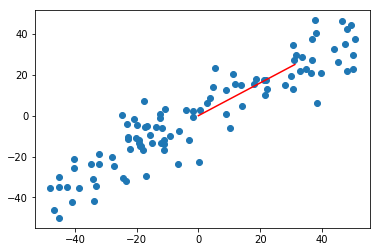

In [12]:
plt.scatter(X[:,0],X[:,1])
plt.plot([0,w[0]*40],[0,w[1]*40],color='r')
plt.show()

### 求第二个主成分

In [13]:
# 把数据在第一主成分上的分量去掉
X2 = np.empty(X.shape)
# for i in range(len(X)):
#     X2[i] = X[i] - (X[i].dot(w) * w)

X2 = X - X.dot(w).reshape(-1,1) * w  # X.dot(w).reshape(-1,1) * w ---> X在第一主成分的投影 = X 在 第一主成分上的投影的模长 * 第一主成分单位向量

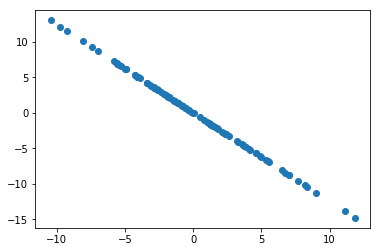

In [14]:
plt.scatter(X2[:,0],X2[:,1])
plt.show()

In [15]:
w2 = first_component(init_w,X2)
w2

array([-0.62529138,  0.78039137])

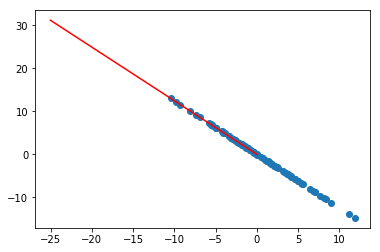

In [16]:
plt.scatter(X2[:,0],X2[:,1])
plt.plot([0,w2[0]*40],[0,w2[1]*40],color='r')
plt.show()

### 求前k个主成分

In [17]:
def first_n_components(k,X):
    X_pca = X.copy()
    X_pca = demean(X_pca)
    res = np.empty((k,X.shape[1]))
    for i in range(k):
        init_w = np.random.random(X_pca.shape[1])
        w = first_component(init_w,X_pca)
        res[i,:] = w
        
        X_pca = X_pca - X_pca.dot(w).reshape(-1,1) * w
        
    return res

In [18]:
w_k = first_n_components(1,X)
w_k

array([[0.78038674, 0.62529715]])

## PCA降维

<img src="../img/11.png" width="500" align="left"/>

In [19]:
X_k = X.dot(w_k.T)
X_k.shape

(100, 1)

从低维恢复到高维，但数据无法恢复和原来一样

$X_{k}\cdot W_{k}=X_{m}$

In [20]:
X_m = X_k.dot(w_k)
X_m.shape

(100, 2)

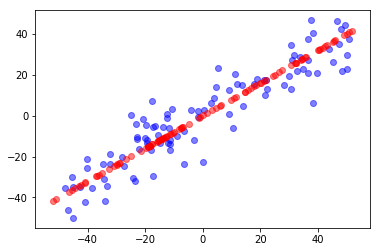

In [21]:
# 注意：恢复回来的数据，是丢失信息的
plt.scatter(X[:,0],X[:,1],color='b',alpha=0.5)
plt.scatter(X_m[:,0],X_m[:,1],color='r',alpha=0.5)
plt.show()

## scikit-learn 中的 PCA

In [22]:
from sklearn.decomposition import PCA

In [23]:
pca = PCA(n_components=1)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [24]:
# 前k个主成分
pca.components_

array([[-0.78038667, -0.62529725]])

In [26]:
# 降维
X_reduction = pca.transform(X)
X_reduction.shape

(100, 1)

In [27]:
# 恢复维度
X_restore = pca.inverse_transform(X_reduction)
X_restore.shape

(100, 2)